# Peter og ulven: Introduktion til forstærkningslæring

I denne tutorial vil vi lære, hvordan man anvender forstærkningslæring på et problem med ruteplanlægning. Scenariet er inspireret af [Peter og ulven](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), et musikalsk eventyr af den russiske komponist [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Det er en historie om den unge pioner Peter, der modigt forlader sit hus og går ud til lysningen i skoven for at jage en ulv. Vi vil træne maskinlæringsalgoritmer, der kan hjælpe Peter med at udforske det omkringliggende område og opbygge et optimalt navigationskort.

Lad os først importere en række nyttige biblioteker:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Oversigt over Forstærkningslæring

**Forstærkningslæring** (RL) er en læringsteknik, der giver os mulighed for at lære en optimal adfærd for en **agent** i et bestemt **miljø** ved at udføre mange eksperimenter. En agent i dette miljø bør have et **mål**, som er defineret af en **belønningsfunktion**.

## Miljøet

For enkelhedens skyld, lad os forestille os Peters verden som et kvadratisk bræt med størrelsen `bredde` x `højde`. Hver celle på dette bræt kan enten være:
* **jord**, som Peter og andre væsener kan gå på
* **vand**, som man selvfølgelig ikke kan gå på
* **et træ** eller **græs** - et sted, hvor man kan hvile sig
* **et æble**, som repræsenterer noget, Peter ville blive glad for at finde for at kunne spise
* **en ulv**, som er farlig og bør undgås

For at arbejde med miljøet vil vi definere en klasse kaldet `Board`. For ikke at gøre denne notesbog for rodet, har vi flyttet al kode, der arbejder med brættet, til et separat modul kaldet `rlboard`, som vi nu vil importere. Du kan kigge ind i dette modul for at få flere detaljer om implementeringens interne funktioner.


Lad os nu oprette en tilfældig tavle og se, hvordan den ser ud:


In [4]:
# code block 1

## Handlinger og Politik

I vores eksempel er Peters mål at finde et æble, samtidig med at han undgår ulven og andre forhindringer. Definér disse handlinger som en ordbog, og kortlæg dem til par af tilsvarende koordinatændringer.


In [5]:
# code block 2

Strategien for vores agent (Peter) er defineret af en såkaldt **politik**. Lad os se på den enkleste politik kaldet **tilfældig vandring**.

## Tilfældig vandring

Lad os først løse vores problem ved at implementere en strategi for tilfældig vandring.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Belønningsfunktion

For at gøre vores politik mere intelligent, skal vi forstå, hvilke træk der er "bedre" end andre.


In [8]:
#code block 5

## Q-Learning

Byg en Q-Table, eller et multidimensionelt array. Da vores bræt har dimensionerne `width` x `height`, kan vi repræsentere Q-Table som et numpy-array med formen `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Videregiv Q-Tabellen til `plot`-funktionen for at visualisere tabellen på brættet:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essensen af Q-Learning: Bellman-ligningen og læringsalgoritmen

Skriv en pseudokode for vores læringsalgoritme:

* Initialiser Q-Tabellen Q med ens værdier for alle tilstande og handlinger
* Sæt læringsraten $\alpha\leftarrow 1$
* Gentag simuleringen mange gange
   1. Start på en tilfældig position
   1. Gentag
        1. Vælg en handling $a$ i tilstanden $s$
        2. Udfør handlingen ved at bevæge dig til en ny tilstand $s'$
        3. Hvis vi støder på en slutspilstilstand, eller den samlede belønning er for lille - afslut simuleringen  
        4. Beregn belønningen $r$ i den nye tilstand
        5. Opdater Q-Funktionen i henhold til Bellman-ligningen: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Opdater den samlede belønning og reducer $\alpha$.

## Udnytte vs. Udforske

Den bedste tilgang er at balancere mellem udforskning og udnyttelse. Efterhånden som vi lærer mere om vores miljø, vil vi være mere tilbøjelige til at følge den optimale rute, men det er stadig vigtigt at vælge den uudforskede vej en gang imellem.

## Python-implementering

Nu er vi klar til at implementere læringsalgoritmen. Før det har vi også brug for en funktion, der kan konvertere vilkårlige tal i Q-Tabellen til en sandsynlighedsvektor for de tilsvarende handlinger:


In [10]:
# code block 7

Vi tilføjer en lille mængde `eps` til den oprindelige vektor for at undgå division med 0 i det indledende tilfælde, hvor alle komponenter i vektoren er identiske.

Den faktiske læringsalgoritme, som vi vil køre i 5000 eksperimenter, også kaldet **epoker**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Efter udførelsen af denne algoritme bør Q-Tabellen opdateres med værdier, der definerer attraktiviteten af forskellige handlinger på hvert trin. Visualiser tabellen her:


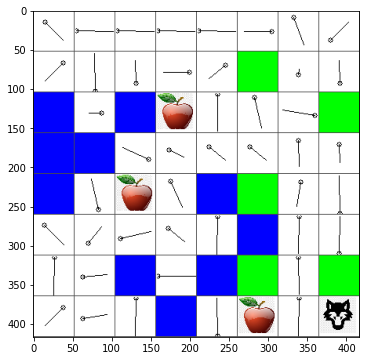

In [43]:
m.plot(Q)

## Kontrol af politikken

Da Q-Tabellen angiver "attraktiviteten" af hver handling i hver tilstand, er det ret nemt at bruge den til at definere den effektive navigation i vores verden. I det enkleste tilfælde kan vi blot vælge den handling, der svarer til den højeste værdi i Q-Tabellen:


In [13]:
# code block 9

2

Hvis du prøver koden ovenfor flere gange, vil du måske bemærke, at den nogle gange bare "hænger", og du er nødt til at trykke på STOP-knappen i notebooken for at afbryde den.

> **Opgave 1:** Modificer `walk`-funktionen til at begrænse den maksimale længde af stien til et bestemt antal trin (for eksempel 100), og observer, hvordan koden ovenfor returnerer denne værdi fra tid til anden.

> **Opgave 2:** Modificer `walk`-funktionen, så den ikke vender tilbage til steder, hvor den allerede har været tidligere. Dette vil forhindre `walk` i at lave loops, men agenten kan stadig ende med at være "fanget" på et sted, hvorfra den ikke kan slippe væk.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


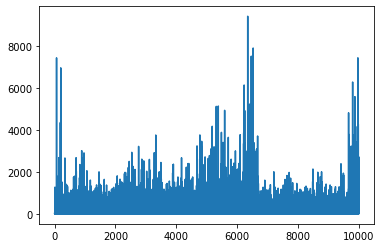

In [57]:
plt.plot(lpath)

## Øvelse
## En mere realistisk Peter og Ulven-verden



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi er ikke ansvarlige for eventuelle misforståelser eller fejltolkninger, der måtte opstå som følge af brugen af denne oversættelse.
